# Perturbation Map Analysis of Binding Free Energies of Lysozyme

This notebook will guide you through how to obtain binding free energies from the using network tools. In particular we want to compute relative binding free energies with respect to benzene as a ligand to Lysozyme. 

The notebook forms part of the CCPBio-Sim workshop **Alchemical Free Energy Simulation Analysis with analyse_freenrg** run on the 11th of April 2018 at the University of Bristol.

*Author: Antonia Mey   
Email: antonia.mey@ed.ac.uk*

**Reading time of the document: 20 mins**

## Let's start with the necessary imports

In [1]:
%pylab inline
import seaborn as sbn
sbn.set_style("ticks")
sbn.set_context("notebook", font_scale = 2)
from networkanalysis.networkanalysis import *
from networkanalysis.experiments import *
from networkanalysis.plotting import *
from networkanalysis.stats import *

Populating the interactive namespace from numpy and matplotlib


### Perturbation maps, quick reminder
In the previous notebook we looked at computing all the relative free energies between ligands for which we had setup simulations according to this perturbation map:   
![foo](../images/perturbation_map.png)

But, what we are of course really interested in is the relative free energy differences of the eight ligands we have simulated: benzene, indole, indene, benzofuran, p-xylene, o-xylene, isoputylbenzene and n-butylbenzne. The following notebook will guide you through exactly this and use the fact that the perturbation map is a graph or network in mathematical terms and in this way utilise a lot of network algorithms to facilitate the analysis. 

## Experimental data
We need to read experimental data in order to be able to compare computed and experimental free energies. For this purpose a free energy file with experimental data taken from this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2104542/pdf/nihms28543.pdf) has conveniently be provided. 

In [2]:
#Initialise the experimental data
exp_data = ExperimentalData()

In [3]:
filename = '../data/FE_exp.csv'
exp_data.read_free_energies(filename, kcal=True)

The experimental data is read into a dictionary which we can access in the following way:

In [4]:
exp_data.freeEnergiesInKcal

[{'benzene': 0.0, 'error': 0.4},
 {'error': 0.4, 'indole': 0.21},
 {'error': 0.4, 'n-butylbenzene': -1.51},
 {'benzofuran': -0.27, 'error': 0.4},
 {'error': 0.4, 'p-xylene': 0.52},
 {'error': 0.4, 'isobutylbenzene': -1.32},
 {'error': 0.4, 'o-xylene': 0.59},
 {'error': 0.4, 'indene': 0.06}]

In this case here errors are arbitrarily chosen rather than using the ones provided from the paper. 

## Simulation data 
Let's read in the simulation data, which we had computed in Exercise02. For convenience a version of the free energy file has been placed in the data directory. 

In order to read in the data we need to initialise a `perturbationGraph`. This object is an extension to the NetworkX library which allows easy computation of network properties, such as weighted paths etc, which is what we need in order to compute our free energies. 

In [5]:
pG = PerturbationGraph()
pG.populate_pert_graph('../data/FE.csv')

We can now compute weighted paths with respect to a particular ligand/compound. For the purpose of this exercise we chose benzene, as it is the compound that forms the substructure of all other simulated compounds. 

In [6]:
pG.compute_weighted_avg_paths('benzene')

We can format free energies in a convenient way that will remove intermediates or average over multiple binding modes. This is not necessary here as we did not use multiple binding modes in the simulation or had intermediates. We can call the function none the less. 

In [7]:
pG.format_free_energies(weighted=True)

`pG.write_free_energies` allows to write the free energies in a nicely formatted way to a file or just display to the standard output. 

In [8]:
pG.write_free_energies(pG.freeEnergyInKcal)

#FREE ENERGIES ARE:
benzene    -0.000 ± 0.000
benzofuran 1.470 ± 0.176
indene     3.056 ± 0.169
indole     3.933 ± 0.172
isobutylbenzene 1.153 ± 0.177
n-butylbenzene -0.371 ± 0.178
o-xylene   2.083 ± 0.173
p-xylene   1.673 ± 0.169


Computing cycle closure is a good way of ensuring that your free energies are well converged. Usually cycle closure errors of less than 1 kcal/mol are a good indication of a reliable dataset. Have a look at the cycles below that result in a poor cycle closure error. (i.e. a threshold of larger than 1 kcal/mol.)

In [9]:
pG.get_cycles()

DDG for cycle ['o-xylene', 'benzene', 'isobutylbenzene', 'p-xylene'] is 1.77 ± 0.16 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'isobutylbenzene'] is 2.57 ± 0.14 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'benzofuran', 'indole'] is 1.02 ± 0.14 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'p-xylene', 'isobutylbenzene'] is 1.09 ± 0.16 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'n-butylbenzene', 'isobutylbenzene'] is 5.12 ± 0.16 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'n-butylbenzene', 'p-xylene'] is 4.16 ± 0.15 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'n-butylbenzene', 'indene'] is 4.36 ± 0.18 kcal/mol
DDG for cycle ['o-xylene', 'benzene', 'indole', 'p-xylene'] is 1.44 ± 0.16 kcal/mol
DDG for cycle ['o-xylene', 'p-xylene', 'benzene', 'isobutylbenzene'] is 2.28 ± 0.15 kcal/mol
DDG for cycle ['o-xylene', 'indene', 'p-xylene', 'isobutylbenzene'] is 1.40 ± 0.20 kcal/mol
DDG for cycle ['o-xylene', 'indene', 'benzene', 'isobutylbenzene'] is 3.67 ± 0.16 kcal/mol
DDG fo

**Task: What does the above suggest for the dataset?**

### Plotting results
freenrgworkflows has a couple of common plotting functions, namely a scatter and bar plot to compare experimental and computed free energy values. We initialise the plotter by giving it an experimental set of free energy values and computed set of free energy values. 

In [10]:
fep = FreeEnergyPlotter(exp_data.freeEnergiesInKcal,pG.freeEnergyInKcal)

['benzene' 'benzofuran' 'indene' 'indole' 'isobutylbenzene'
 'n-butylbenzene' 'o-xylene' 'p-xylene']


The bar plot is called in the following way:

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57321e1d68>,
 <matplotlib.figure.Figure at 0x7f57321e1710>)

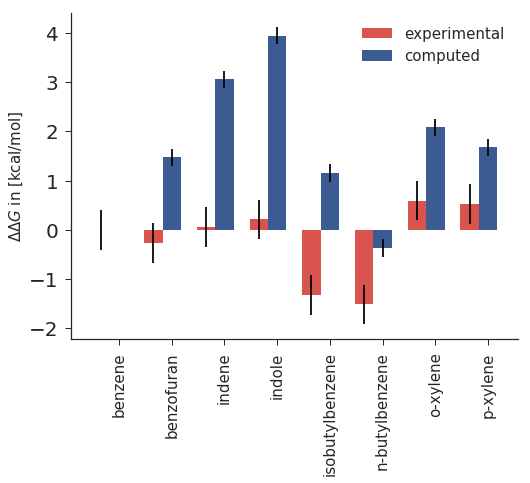

In [11]:
fep.plot_bar_plot()

The same data in a scatter plot looks like this:

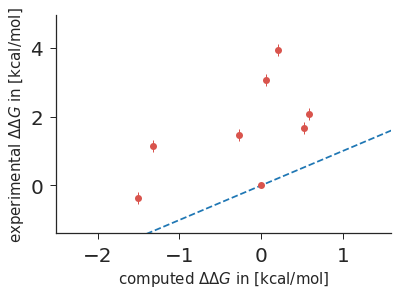

In [12]:
fep.plot_scatter_plot()

### Statistics
Now we might want to know something about the statistics of the computed free energies, i.e what is the correlation between the two datasets and what is the mean unsigned error in kcal/mol. The statistics module has basic functionality for that and computes samples of the dataset in order to look at the spread and reliability of the correlation estimate. 


In [13]:
stats = freeEnergyStats()

The next cell will generate 10000 samples of the dataset in order to assess the spread in the measures used here: correlation coefficient R, Kendall tau and mean unsigned error. 

In [14]:
stats.generate_statistics(pG.freeEnergyInKcal,exp_data.freeEnergiesInKcal,repeats=10000)

In [15]:
print ('Summary of statistics:')
print ('----------------------')
print ('Correlation coefficient: %.2f ± %.2f' %(stats.R, stats.R_std))
print ('R^2:                     %.2f ± %.2f' %(stats.R2, stats.R2_std))
print ('Kendall tau:             %.2f ± %.2f' %(stats.tau, stats.tau_std))
print ('mean unsigned error:     %.2f ± %.2f [kcal/mol]' %(stats.mue, stats.mue_std))

Summary of statistics:
----------------------
Correlation coefficient: 0.57 ± 0.03
R^2:                     0.32 ± 0.04
Kendall tau:             0.54 ± 0.04
mean unsigned error:     1.84 ± 1.84 [kcal/mol]


**Tasks:**   
- Look up exactly what R, R^2 and tau measure and make sure you understand what the values mean. 
- You will find a second dataset (data/FE_second.csv) as well as the TI data (data/FE_ti.csv) in the data directory. Run the same analysis with the second data set. What do you observe? 

In [ ]:
# Read in second set of simulation data
pG_2 = PerturbationGraph()
pG_2.populate_pert_graph('../data/FE_second.csv')
pG_2.compute_weighted_avg_paths('benzene')

In [ ]:
# Look at plots of second simulation set with respect to the experimental values



In [ ]:
# Run the statistical analysis of the second data set with respect to the experimental values. 



## A little quiz for the end
Please have a quick look at this quiz to see what you have learned from this notebook: https://goo.gl/forms/Onsdxftz1DnLDekM2

Congratulations you are now able to analyse alchemical free energy calculations!